<a href="https://colab.research.google.com/github/RabbitKM/Exercise/blob/main/web%20crawler/ST_crawler.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 套件安裝

In [2]:
import requests
import io
import json
import prettytable

import matplotlib.pyplot as plt
from PIL import Image

from collections import Counter

import os
import codecs

### 1. 關鍵字(cuttlefish)

In [3]:
# Image搜尋
def method1_image(page, limit, name):
  req = requests.get(
      'https://stock.adobe.com/tw/Ajax/Search',
      headers={
          'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:102.0) Gecko/20100101 Firefox/102.0',
          'Referer': 'https://stock.adobe.com/uk/search/images?filters%5Bcontent_type%3Aphoto%5D=1&filters%5Bcontent_type%3Aillustration%5D=1&filters%5Bcontent_type%3Azip_vector%5D=1&filters%5Bcontent_type%3Avideo%5D=0&filters%5Bcontent_type%3Atemplate%5D=0&filters%5Bcontent_type%3A3d%5D=0&filters%5Bcontent_type%3Aaudio%5D=0&filters%5Bcontent_type%3Aimage%5D=1&filters%5Binclude_stock_enterprise%5D=0&filters%5Bis_editorial%5D=0&k=cuttlefish&order=relevance&price%5B%24%5D=1&safe_search=1&search_page=1&search_type=usertyped&acp=&get_facets=0',
          'Cookie': '_ga=GA1.3.253445803.1652016416; auth.strategy=local; _gid=GA1.3.1823959815.1652333736',
      },
      params={
          'filters[content_type:photo]': '1',
          'filters[content_type:illustration]': '1',
          'filters[content_type:zip_vector]': '1',
          'filters[content_type:video]': '0',
          'filters[content_type:template]': '0',
          'filters[content_type:3d]': '0',
          'filters[content_type:audio]': '0',
          'filters[include_stock_enterprise]': '0',
          'filters[content_type:image]': '1',
          'filters[order]': 'relevance',
          'k': name,
          'order': 'relevance',
          'safe_search': '1',
          'limit': limit,
          'search_type': 'asset-type-change',
          'search_page': page,
          'price[$]': '1',
          'get_facets': '1',
      },
      data={},
  )
  ret = json.loads(req.text)
  id_list = sorted(list(ret['items'].keys())) # 取content_id + 排序
  return ret, id_list

In [4]:
# Premium
def method1_premium(page, limit, name):
  req = requests.get(
      'https://stock.adobe.com/uk/Ajax/Search',
      headers={
          'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:102.0) Gecko/20100101 Firefox/102.0',
          'Referer': 'https://stock.adobe.com/uk/search/images?filters%5Bcontent_type%3Aphoto%5D=1&filters%5Bcontent_type%3Aillustration%5D=1&filters%5Bcontent_type%3Azip_vector%5D=1&filters%5Bcontent_type%3Avideo%5D=0&filters%5Bcontent_type%3Atemplate%5D=0&filters%5Bcontent_type%3A3d%5D=0&filters%5Bcontent_type%3Aaudio%5D=0&filters%5Bcontent_type%3Aimage%5D=1&filters%5Binclude_stock_enterprise%5D=0&filters%5Bis_editorial%5D=0&k=cuttlefish&order=relevance&price%5B%24%5D=1&safe_search=1&search_page=1&search_type=usertyped&acp=&get_facets=0',
          'Cookie': '_ga=GA1.3.253445803.1652016416; auth.strategy=local; _gid=GA1.3.1823959815.1652333736',
      },
      params={
          'filters[content_type:photo]': '1',
          'filters[content_type:illustration]': '1',
          'filters[content_type:zip_vector]': '1',
          'filters[content_type:video]': '0',
          'filters[content_type:template]': '0',
          'filters[content_type:3d]': '0',
          'filters[content_type:audio]': '0',
          'filters[content_type:image]': '1',
          'filters[include_stock_enterprise]': '0',
          'filters[is_editorial]': '0',
          'k': name,
          'order': 'relevance',
          'price[$$]': '1',
          'price[$$$]': '1',
          'safe_search': '1',
          'limit': limit,
          'search_page': page,
          'search_type': 'usertyped',
          'acp': '',
      },
      data={},
  )
  ret = json.loads(req.text)
  id_list = sorted(list(ret['items'].keys())) # 取content_id + 排序
  return ret, id_list

### 2. 關鍵字(cuttlefish) + find-similar

In [5]:
# # Image搜尋
# def method2_image(page, limit, name, similar_content_id):
#   req = requests.get(
#       'https://stock.adobe.com/uk/Ajax/Search',
#       headers={
#           'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:102.0) Gecko/20100101 Firefox/102.0',
#           'Referer': 'https://stock.adobe.com/uk/search/images?filters%5Bcontent_type%3Aphoto%5D=1&filters%5Bcontent_type%3Aillustration%5D=1&filters%5Bcontent_type%3Azip_vector%5D=1&filters%5Bcontent_type%3Avideo%5D=0&filters%5Bcontent_type%3Atemplate%5D=0&filters%5Bcontent_type%3A3d%5D=0&filters%5Bcontent_type%3Aaudio%5D=0&filters%5Bcontent_type%3Aimage%5D=1&filters%5Binclude_stock_enterprise%5D=0&filters%5Bis_editorial%5D=0&k=cuttlefish&order=relevance&price%5B%24%5D=1&safe_search=1&search_page=1&search_type=usertyped&acp=&get_facets=0',
#           'Cookie': '_ga=GA1.3.253445803.1652016416; auth.strategy=local; _gid=GA1.3.1823959815.1652333736',
#       },
#       params={
#           'filters[content_type:photo]': '1',
#           'filters[content_type:illustration]': '1',
#           'filters[content_type:zip_vector]': '1',
#           'filters[content_type:video]': '0',
#           'filters[content_type:template]': '0',
#           'filters[content_type:3d]': '0',
#           'filters[content_type:audio]': '0',
#           'filters[content_type:image]': '1',
#           'filters[include_stock_enterprise]': '0',
#           'filters[is_editorial]': '0',
#           'k': name,
#           'order': 'relevance',
#           'price[$]': '1',  # Premium無此行
#           'safe_search': '1',
#           'limit': limit,
#           'search_page': page,
#           'search_type': 'details-find-similar',
#           'serie_id': '',
#           'model_id': '',
#           'native_visual_search': '',
#           'similar_content_id': similar_content_id,
#           'find_similar_by': 'all',
#           'get_facets': '0', # Premium無此行
#       },
#       data={},
#   )
#   ret = json.loads(req.text)
#   id_list = sorted(list(ret['items'].keys())) # 取content_id + 排序
#   return ret, id_list

In [6]:
# Image搜尋
def method2_image(page, limit, name, similar_content_id, find_similar_by):
  req = requests.get(
      'https://stock.adobe.com/uk/Ajax/Search',
      headers={
          'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:102.0) Gecko/20100101 Firefox/102.0',
          'Referer': 'https://stock.adobe.com/uk/search/images?filters%5Bcontent_type%3Aphoto%5D=1&filters%5Bcontent_type%3Aillustration%5D=1&filters%5Bcontent_type%3Azip_vector%5D=1&filters%5Bcontent_type%3Avideo%5D=0&filters%5Bcontent_type%3Atemplate%5D=0&filters%5Bcontent_type%3A3d%5D=0&filters%5Bcontent_type%3Aaudio%5D=0&filters%5Bcontent_type%3Aimage%5D=1&filters%5Binclude_stock_enterprise%5D=0&filters%5Bis_editorial%5D=0&k=cuttlefish&order=relevance&price%5B%24%5D=1&safe_search=1&search_page=1&search_type=usertyped&acp=&get_facets=0',
          'Cookie': '_ga=GA1.3.253445803.1652016416; auth.strategy=local; _gid=GA1.3.1823959815.1652333736',
      },
      params={
          'filters[content_type:photo]': '1',
          'filters[content_type:illustration]': '1',
          'filters[content_type:zip_vector]': '1',
          'filters[content_type:video]': '0',
          'filters[content_type:template]': '0',
          'filters[content_type:3d]': '0',
          'filters[content_type:audio]': '0',
          'filters[content_type:image]': '1',
          'filters[include_stock_enterprise]': '0',
          'filters[is_editorial]': '0',
          'k': name,
          'order': 'relevance',
          'price[$]': '1',  # Premium無此行
          'safe_search': '1',
          'limit': limit,
          'search_page': page,
          'search_type': 'details-find-similar',
          'serie_id': '',
          'model_id': '',
          'native_visual_search': '',
          'similar_content_id': similar_content_id,
          'find_similar_by': find_similar_by,
          'get_facets': '0', # Premium無此行
      },
      data={},
  )
  ret = json.loads(req.text)
  # id_list = sorted(list(ret['items'].keys())) # 取content_id + 排序
  id_list = list(ret['items'].keys()) # 取content_id
  return ret, id_list

In [7]:
# Premium搜尋
def method2_premium(page, limit, name, similar_content_id):
  req = requests.get(
      'https://stock.adobe.com/uk/Ajax/Search',
      headers={
          'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:102.0) Gecko/20100101 Firefox/102.0',
          'Referer': 'https://stock.adobe.com/uk/search/images?filters%5Bcontent_type%3Aphoto%5D=1&filters%5Bcontent_type%3Aillustration%5D=1&filters%5Bcontent_type%3Azip_vector%5D=1&filters%5Bcontent_type%3Avideo%5D=0&filters%5Bcontent_type%3Atemplate%5D=0&filters%5Bcontent_type%3A3d%5D=0&filters%5Bcontent_type%3Aaudio%5D=0&filters%5Bcontent_type%3Aimage%5D=1&filters%5Binclude_stock_enterprise%5D=0&filters%5Bis_editorial%5D=0&k=cuttlefish&order=relevance&price%5B%24%5D=1&safe_search=1&search_page=1&search_type=usertyped&acp=&get_facets=0',
          'Cookie': '_ga=GA1.3.253445803.1652016416; auth.strategy=local; _gid=GA1.3.1823959815.1652333736',
      },
      params={
          'filters[content_type:photo]': '1',
          'filters[content_type:illustration]': '1',
          'filters[content_type:zip_vector]': '1',
          'filters[content_type:video]': '0',
          'filters[content_type:template]': '0',
          'filters[content_type:3d]': '0',
          'filters[content_type:audio]': '0',
          'filters[content_type:image]': '1',
          'filters[include_stock_enterprise]': '0',
          'filters[is_editorial]': '0',
          'k': name,
          'order': 'relevance',
          'price[$$]': '1', # Image無此行
          'price[$$$]': '1', # Image無此行
          'safe_search': '1',
          'limit': limit,
          'search_page': page,
          'search_type': 'details-find-similar',
          'serie_id': '',
          'model_id': '',
          'native_visual_search': '',
          'similar_content_id': similar_content_id, # 以圖搜尋的id
          'find_similar_by': 'all',
      },
      data={},
  )
  ret = json.loads(req.text)
  id_list = sorted(list(ret['items'].keys())) # 取content_id + 排序
  return ret, id_list

### 3. 上傳圖片找圖
62cdac6e2152f  
`\02_室內\02_花枝\B-P1-146.JPG`

62ced2af90571  
`\02_室內\02_花枝_多隻\M-P1-003.JPG`

In [8]:
# Image搜尋
def method3_image(page, limit, name, similar_content_id, native_visual_search):
  req = requests.get(
      'https://stock.adobe.com/uk/Ajax/Search',
      headers={
          'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:102.0) Gecko/20100101 Firefox/102.0',
          'Referer': 'https://stock.adobe.com/uk/search/images?filters%5Bcontent_type%3Aphoto%5D=1&filters%5Bcontent_type%3Aillustration%5D=1&filters%5Bcontent_type%3Azip_vector%5D=1&filters%5Bcontent_type%3Avideo%5D=0&filters%5Bcontent_type%3Atemplate%5D=0&filters%5Bcontent_type%3A3d%5D=0&filters%5Bcontent_type%3Aaudio%5D=0&filters%5Bcontent_type%3Aimage%5D=1&filters%5Binclude_stock_enterprise%5D=0&filters%5Bis_editorial%5D=0&k=cuttlefish&order=relevance&price%5B%24%5D=1&safe_search=1&search_page=1&search_type=usertyped&acp=&get_facets=0',
          'Cookie': '_ga=GA1.3.253445803.1652016416; auth.strategy=local; _gid=GA1.3.1823959815.1652333736',
      },
      params={
          'filters[content_type:photo]': '1',
          'filters[content_type:illustration]': '1',
          'filters[content_type:zip_vector]': '1',
          'filters[content_type:image]': '1',
          'order': 'relevance',
          'price[$]': '1', #
          'safe_search': '1',
          'limit': limit,
          'search_page': page,
          'search_type': 'visual-search-browse',
          'k': name,
          'native_visual_search': native_visual_search,
          'similar_content_id': similar_content_id,
          'model_id': '',
          'serie_id': '',
          'find_similar_by': 'all',
          'get_facets': '0', #
      },
      data={},
  )
  ret = json.loads(req.text)
  id_list = sorted(list(ret['items'].keys())) # 取content_id + 排序
  return ret, id_list

In [9]:
# Premium搜尋
def method3_premium(page, limit, name, similar_content_id, native_visual_search):
  req = requests.get(
      'https://stock.adobe.com/uk/Ajax/Search',
      headers={
          'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:102.0) Gecko/20100101 Firefox/102.0',
          'Referer': 'https://stock.adobe.com/uk/search/images?filters%5Bcontent_type%3Aphoto%5D=1&filters%5Bcontent_type%3Aillustration%5D=1&filters%5Bcontent_type%3Azip_vector%5D=1&filters%5Bcontent_type%3Avideo%5D=0&filters%5Bcontent_type%3Atemplate%5D=0&filters%5Bcontent_type%3A3d%5D=0&filters%5Bcontent_type%3Aaudio%5D=0&filters%5Bcontent_type%3Aimage%5D=1&filters%5Binclude_stock_enterprise%5D=0&filters%5Bis_editorial%5D=0&k=cuttlefish&order=relevance&price%5B%24%5D=1&safe_search=1&search_page=1&search_type=usertyped&acp=&get_facets=0',
          'Cookie': '_ga=GA1.3.253445803.1652016416; auth.strategy=local; _gid=GA1.3.1823959815.1652333736',
      },
      params={
          'filters[content_type:photo]': '1',
          'filters[content_type:illustration]': '1',
          'filters[content_type:zip_vector]': '1',
          'filters[content_type:image]': '1',
          'order': 'relevance',
          'price[$$]': '1', #
          'price[$$$]': '1', #
          'safe_search': '1',
          'limit': limit,
          'search_page': page,
          'search_type': 'visual-search-browse',
          'k': name,
          'native_visual_search': native_visual_search,
          'similar_content_id': similar_content_id,
          'model_id': '',
          'serie_id': '',
          'find_similar_by': 'all',
      },
      data={},
  )
  ret = json.loads(req.text)
  id_list = sorted(list(ret['items'].keys())) # 取content_id + 排序
  return ret, id_list

### 參考對照(html)

In [ ]:
'''
from bs4 import BeautifulSoup
import requests
name = 0    #  設定圖片編號
for p in range(1,6,1):
  req = requests.get("https://stock.adobe.com/uk/search/images",
          headers= {"user-agent":"Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/100.0.4896.75 Safari/537.36",
                "cookies":"",
                "referer":"https://stock.adobe.com/"},
          params= {"filters%5Bcontent_type%3Aphoto%5D":1,
                "filters%5Bcontent_type%3Azip_vector%5D":1,
                "filters%5Bcontent_type%3Aillustration%5D":1,
                "filters%5Bcontent_type%3Avideo%5D":0,
                "filters%5Bcontent_type%3Atemplate%5D":0,
                "filters%5Bcontent_type%3A3d%5D":0,
                "filters%5Bcontent_type%3Aaudio%5D":0,
                "filters%5Bcontent_type%3Aimage%5D":1,
                "filters%5Binclude_stock_enterprise%5D":0,
                "filters%5Bis_editorial%5D":0,
                "k":"squid",
                "order":"relevance",
                "price%5B%24%5D":1,
                "safe_search":1,
                "similar_content_id":440520360,
                "search_page":p,
                "get_facets":0,
                "search_type":"pagination",
                },
          data={})
  p1 = BeautifulSoup(req.text, "html.parser")
  imgs = p1.find_all('img')

  for i in imgs:
      if 'src' in i.attrs:
          if i['src'].endswith('.jpg'):
              jpg = requests.get(i['src']) # 使用 requests 讀取圖片網址，取得圖片編碼
              
              print("編號:",name,i['src'])
              
              with open(f'/content/drive/MyDrive/06_緯育/12_團體專題_個人/爬蟲test/squid_image/{name}.jpg', 'wb') as f:
                f.write(jpg.content)   # 寫入圖片的 content
              name = name + 1
'''

### 查詢結果印圖函數

In [11]:
def plot(ret, id_list):
  plt.figure(figsize=(15, (len(id_list)//10)*3))
  width = 10
  height = len(id_list) // width + 1
  for i in range(len(id_list)):
    url = ret['items'][id_list[i]]['content_thumb_extra_large_url']
    response = requests.get(url, stream=True)
    img = Image.open(response.raw).convert("RGB")

    plt.subplot(height, width, i+1)
    t = "{}\nW:{}\nH:{} ({})".format(id_list[i], img.width, img.height, i)
    plt.title(t)
    plt.axis("off")
    plt.imshow(img)

### 排除id重複值 (保留但不使用)

In [12]:
def check_list(temp_list, id_list):
  new_id_list = []
  for id in id_list:
    if id not in temp_list:
      new_id_list.append(id)
      temp_list.append(id)
  return new_id_list

In [ ]:
# 存檔時依id存便可排除重複值
# 在此仍保留可運作的重置id_list的程式碼
'''
# 排除重複值
temp_list = []
id_list2 = check_list(temp_list, id_list2)
id_list3 = check_list(temp_list, id_list3)
p_id_list2 = check_list(temp_list, p_id_list2)
p_id_list3 = check_list(temp_list, p_id_list3)

# 查看排除的效果
all_id_list = id_list2 + id_list3 + p_id_list2 + p_id_list3
c_all = dict(Counter(all_id_list))
c_over = check(c_all)

print('全部張數:', len(all_id_list))
print('不重複張數:', len(c_all))
print('重複id數:', len(c_over), c_over)
'''

### 圖片下載

In [14]:
def download(ret, id_list, dir, name):
  for id in id_list:
    # 取圖片網址
    url = ret['items'][id]['content_thumb_extra_large_url']
    req2 = requests.get(url)
    
    # 資料夾與檔名
    filepath = dir + '/'
    filename = name + '_st_' + id + '.jpg'
    if not os.path.exists(filepath):
        os.mkdir(filepath)

    # 存檔
    with codecs.open(filepath + filename, 'wb') as f:
      f.write(req2.content)
    
    # 顯示完成進度
    print(str(id_list.index(id)).zfill(3) ,filename, 'Downloaded')

### 主程式

In [15]:
# 結合取圖片網址+畫圖+存檔
def output_all(name, serch_list):
  # 儲存所有圖片id
  all_id_list = []

  for dd in serch_list:
    ret, id_list = method2_image(1, dd[1], name, dd[0], dd[2])
    all_id_list += id_list
    plot(ret, id_list) # 畫圖看一下
    
    # 下載
    # print('times:', serch_list.index(dd))
    # download(ret, id_list, 'image_cuttlefish', name)

  return all_id_list

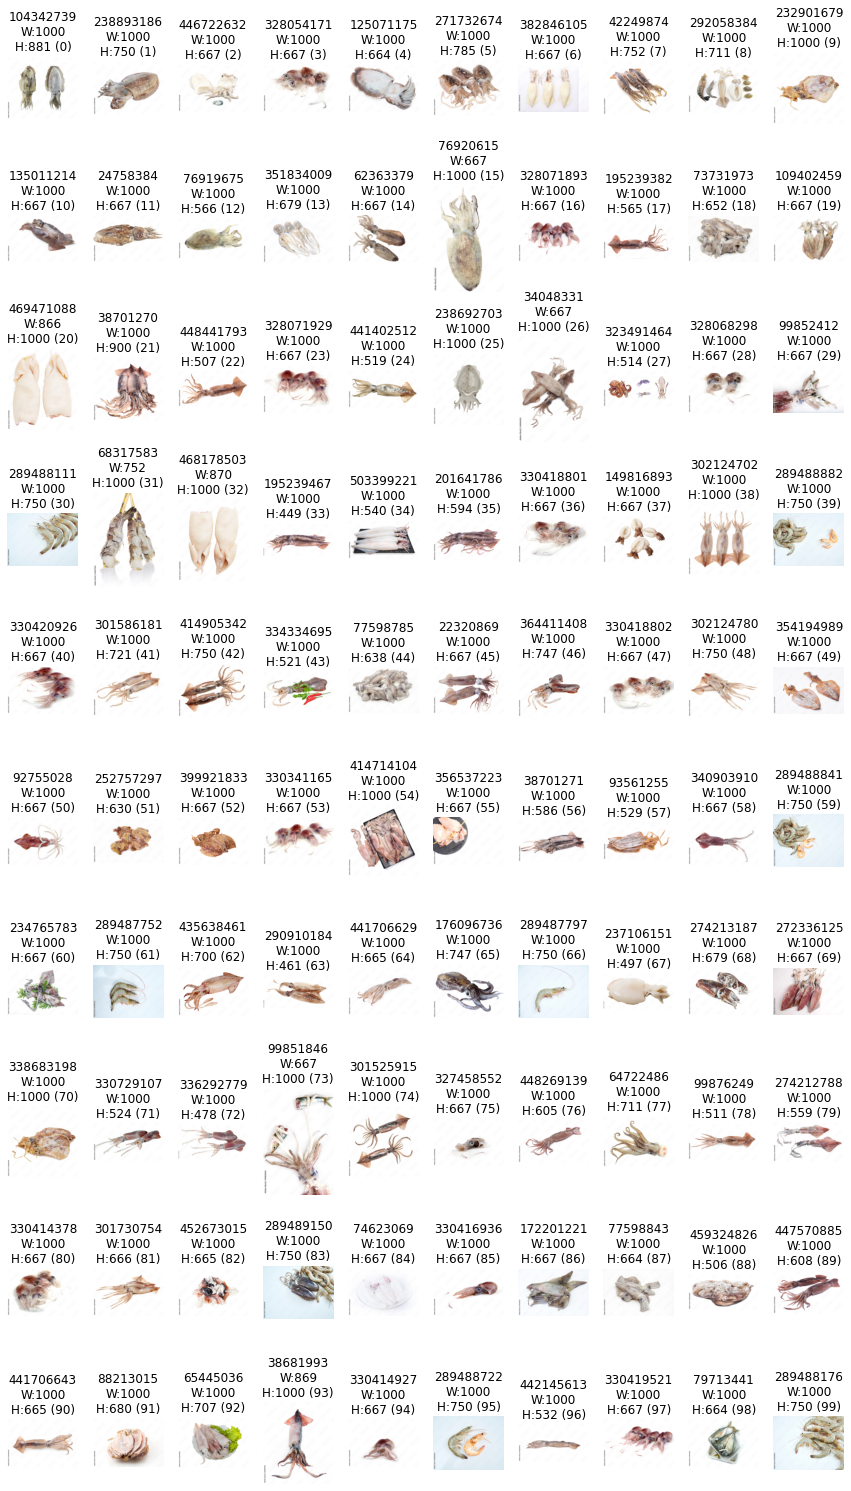

In [16]:
# 放入: [欲搜尋圖片id, 張數(小於101), 搜尋模式(all/content/color/composition)]
serch_list = [
          ['104342739', 100, 'all'],
          # ['441337789', 100, 'all'],
          # ['36542254', 50, 'content'],
          # ['36542254', 50, 'color'],
          # ['271732674', 100, 'content'],
          # ['271732674', 100, 'color'],
          # ['83808821', 50, 'content'],
          # ['233719171', 100, 'content'],
          # ['9483264', 100, 'content'],
          # ['331778111', 100, 'content'],
          # ['373914467', 100, 'all'],
          # ['383395371', 100, 'content'],
          # ['445298189', 100, 'content'],
          # ['274213187', 100, 'all'],
          # ['158127051', 100, 'all'],
          # ['11340543', 100, 'content'],
          # ['333131966', 100, 'content'],
          # ['68493676', 100, 'all'],
          # ['291635405', 100, 'content'],
]
# 主程序
all_id_list = output_all('cuttlefish', serch_list)

In [91]:
# 查看id重複張數
def check(temp):
  return [k for (k,v) in temp.items() if v > 1]

c_all = dict(Counter(all_id_list))
c_over = check(c_all)

print('全部張數:', len(all_id_list))
print('不重複張數:', len(c_all))
print('重複id數:', len(c_over), c_over)

全部張數: 1750
不重複張數: 1223
重複id數: 317 ['238893186', '446722632', '328054171', '271732674', '42249874', '232901679', '135011214', '24758384', '76919675', '351834009', '62363379', '328071893', '195239382', '73731973', '109402459', '38701270', '448441793', '328071929', '441402512', '34048331', '323491464', '328068298', '99852412', '289488111', '195239467', '330418801', '149816893', '330420926', '301586181', '414905342', '334334695', '77598785', '22320869', '364411408', '330418802', '252757297', '399921833', '414714104', '93561255', '340903910', '289487752', '435638461', '290910184', '441706629', '176096736', '274213187', '272336125', '338683198', '330729107', '301525915', '327458552', '64722486', '274212788', '330414378', '452673015', '289489150', '330416936', '172201221', '459324826', '441706643', '65445036', '38681993', '330414927', '289488722', '442145613', '330419521', '79713441', '441337789', '441337796', '441337653', '440678211', '441337782', '440743973', '296723787', '440864789', '4153

In [ ]:
# 檔案打包
!zip -r image_cuttlefish.zip image_cuttlefish